In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

<h4>Hands-on: Linear Regression - Complex Shapes</h4>
<b>Test 1</b><br>
Input Features: x<br>
Output/Target: y_noisy<br>
Objective: Underfitting demo

<b>Test 2</b><br>
Input Features: x, x^2<br>
Output/Target: y_noisy<br>
Objective: How adding relevant features improves predicting accuracy<br>

In [2]:
def quad_func (x):
    return 5*x**2 -23*x + 47

In [3]:
# Training Set + Eval Set: 200 samples (70%,30% split)
# Test Set: 60 samples
# Total: 260 samples

In [4]:
np.random.seed(5)
samples = 260
x_vals = pd.Series(np.random.rand(samples)*20)
x2_vals = x_vals ** 2
y_vals = x_vals.map(quad_func)
y_noisy_vals = y_vals + np.random.randn(samples) * 50

In [5]:
df = pd.DataFrame({'x':x_vals, 'x2': x2_vals ,'y':y_vals, 'y_noisy':y_noisy_vals})

In [6]:
df.head()

,x,x2,y,y_noisy
0,4.439863,19.712387,43.445077,88.950606
1,17.414646,303.269900,1162.812637,1193.704875
2,4.134383,17.093124,37.374807,62.355709
3,18.372218,337.538400,1312.130983,1254.553770
4,9.768224,95.418196,299.421832,268.896012


In [7]:
df.corr()

,x,x2,y,y_noisy
x,1.000000,0.968304,0.948299,0.940940
x2,0.968304,1.000000,0.997515,0.991770
y,0.948299,0.997515,1.000000,0.994777
y_noisy,0.940940,0.991770,0.994777,1.000000


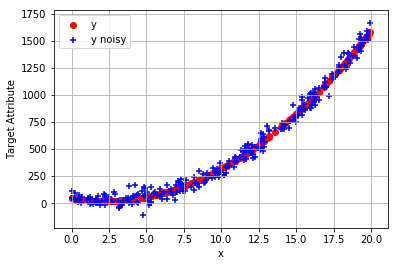

In [8]:
plt.scatter(x=df['x'],y=df['y'],color='r',label='y',)
plt.scatter(x=df['x'],y=df['y_noisy'],color='b',label='y noisy', marker='+')
plt.xlabel('x')
plt.ylabel('Target Attribute')
plt.grid(True)
plt.legend()

In [9]:
data_path = r'/Users/jennaolsen/Dropbox/AWS_WhiteRabbit/AWSMLCourse/Data/RegressionExamples/quadratic'

In [10]:
df.to_csv(os.path.join(data_path,'quadratic_example_all.csv'),index=True,index_label='Row')

<h4>Training and Evaluation Set</h4>
Training Set 1: RowNumber, x, y_noisy<br>
Training Set 2: RowNumber, x, x**2, y_noisy

In [11]:
df[df.index < 200].to_csv(os.path.join(data_path,'quadratic_example_train_underfit.csv'),
                          index=True,index_label='Row',
                         columns=['x','y_noisy'])

In [12]:
df[df.index < 200].to_csv(os.path.join(data_path,'quadratic_example_train_normal.csv'),
                          index=True,index_label='Row',
                         columns=['x','x2','y_noisy'])

In [13]:
df.to_csv(
    os.path.join(data_path,'quadratic_example_test_all_underfit.csv'),
    index=True,index_label='Row', columns=['x'])

In [14]:
df.to_csv(
    os.path.join(data_path,'quadratic_example_test_all_normal.csv'),
    index=True,index_label='Row', columns=['x','x2'])

In [16]:
# Pull Predictions
# Prediction without quadratic term
df = pd.read_csv(os.path.join(data_path,'quadratic_example_all.csv'), index_col='Row')
df_predicted_underfit = pd.read_csv(os.path.join(data_path,'output_underfit',
                                        '/Users/jennaolsen/Dropbox/AWS_WhiteRabbit/AWSMLCourse/Data/RegressionExamples/quadratic/output_underfit/bp-nFhICLYSHtX-quadratic_example_test_all_underfit.csv'))
df_predicted_underfit.columns = ["Row","y_predicted"]

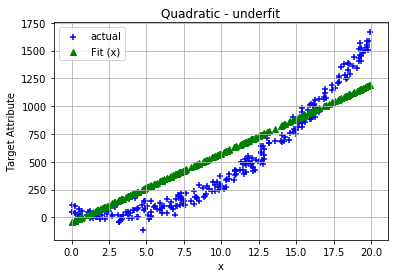

In [17]:
plt.scatter(x=df.x,y=df.y_noisy,color='b',label='actual', marker='+')
plt.scatter(x=df.x ,y=df_predicted_underfit.y_predicted ,color='g',label='Fit (x)',marker='^')
plt.title('Quadratic - underfit')
plt.xlabel('x')
plt.ylabel('Target Attribute')
plt.grid(True)
plt.legend()

Test 1:
Training RMSE: 385.18, Evaluation RMSE: 257.89, Baseline RMSE: 437.31

RMSE for the model is large and closer to baseline

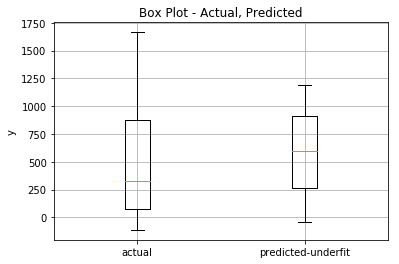

In [18]:
plt.boxplot([df.y_noisy,df_predicted_underfit.y_predicted], 
            labels=['actual','predicted-underfit'])
plt.title('Box Plot - Actual, Predicted')
plt.ylabel('y')
plt.grid(True)

In [19]:
df.y_noisy.describe()

count     260.000000
mean      492.434283
std       478.849813
min      -112.575294
25%        77.826912
50%       327.241317
75%       874.702202
max      1664.910364
Name: y_noisy, dtype: float64

In [20]:
df_predicted_underfit.y_predicted.describe()

count     260.000000
mean      580.897939
std       362.081243
min       -41.662180
25%       261.683525
50%       592.695950
75%       911.592175
max      1193.012000
Name: y_predicted, dtype: float64

In [21]:
df_predicted_normal = pd.read_csv(os.path.join(data_path,'output_normal',
                                        '/Users/jennaolsen/Dropbox/AWS_WhiteRabbit/AWSMLCourse/Data/RegressionExamples/quadratic/output_normal/bp-svw8iWBtwSu-quadratic_example_test_all_normal.csv.gz'))
df_predicted_normal.columns = ["Row","y_predicted"]

Text(0,0.5,'Target Attribute')

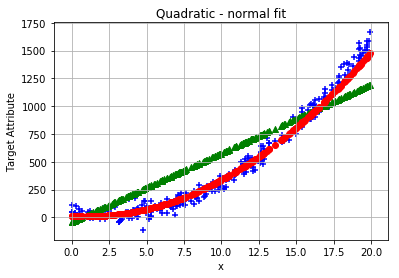

In [22]:
plt.scatter(x=df.x,y=df.y_noisy,color='b',label='actual', marker='+')
plt.scatter(x=df.x ,y=df_predicted_underfit.y_predicted ,color='g',label='Fit (x)',marker='^')
plt.scatter(x=df.x ,y=df_predicted_normal.y_predicted ,color='r',label='Fit (x,x^2)')
plt.title('Quadratic - normal fit')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('Target Attribute')
#plt.legend()

Test 1:
Training RMSE: 385.18, Evaluation RMSE: 257.89, Baseline RMSE: 437.31

Test 2:
Training RMSE: 132.20, Evaluation RMSE: 63.68, Baseline RMSE: 437.31

Test 2 RMSE is much better compared to baseline. Do note that we added approx -50 to 50 noise value to y

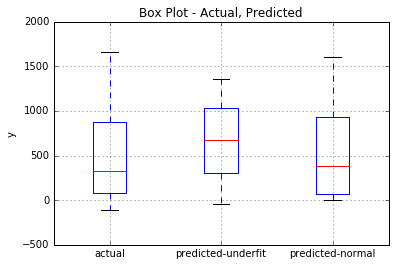

In [30]:
plt.boxplot([df.y_noisy,df_predicted_underfit.y_predicted,df_predicted_normal.y_predicted], 
            labels=['actual','predicted-underfit','predicted-normal'])
plt.title('Box Plot - Actual, Predicted')
plt.ylabel('y')
plt.grid(True)

In [ ]:
df_predicted_underfit.head()

In [ ]:
df_predicted_normal.head()

<h4>Summary</h4>
1. Underfitting occurs when model does not accurately capture relationship between features and target
2. Underfitting would cause large training errors and evaluation errors.<br>
Training RMSE: 385.1816 Evaluation RMSE: 257.8979. Baseline RMSE:437.311
3. Evaluation Summary - Prediction overestimation and underestimation histogram provided by AWS ML console provides important clues on how the model is behaving.  Ideally, under-estimation and over-estimation needs to be balanced and centered around 0.
4. Box plot also highlights distribution differences between predicted and actual
5. To address underfitting, add higher order polynomials or more relevant features to capture complex relationship<br>
Training RMSE: 132.2032 Evaluation RMSE: 63.6847. Baseline RMSE:437.311
6. When working with datasets containing 100s or even 1000s of features, it important to rely on these metrics and distribution to gain insight into model performance.